This notebook uses CSVs and dataframes produced by ortholog_census.ipynb to visualize results regarding the presence and location of pro2 genes.

In [1]:
import os
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
import seaborn as sns
import plotly.graph_objects as go
from plotnine import *

In [14]:
combined_df = pd.read_csv('../data/complete_only.csv', index_col=0)
display (combined_df)

,OrthologID,Genome_copies,Island_copies
0,60000015,2.777778,0.962963
1,60000028,2.592593,0.444444
2,60000046,2.333333,0.555556
3,60000126,1.222222,0.444444
4,60000600,1.000000,0.222222
...,...,...,...
87,60005258,0.111111,NaN
88,60005558,0.037037,NaN
89,60007386,0.000000,0.000000
90,60008213,0.037037,0.037037


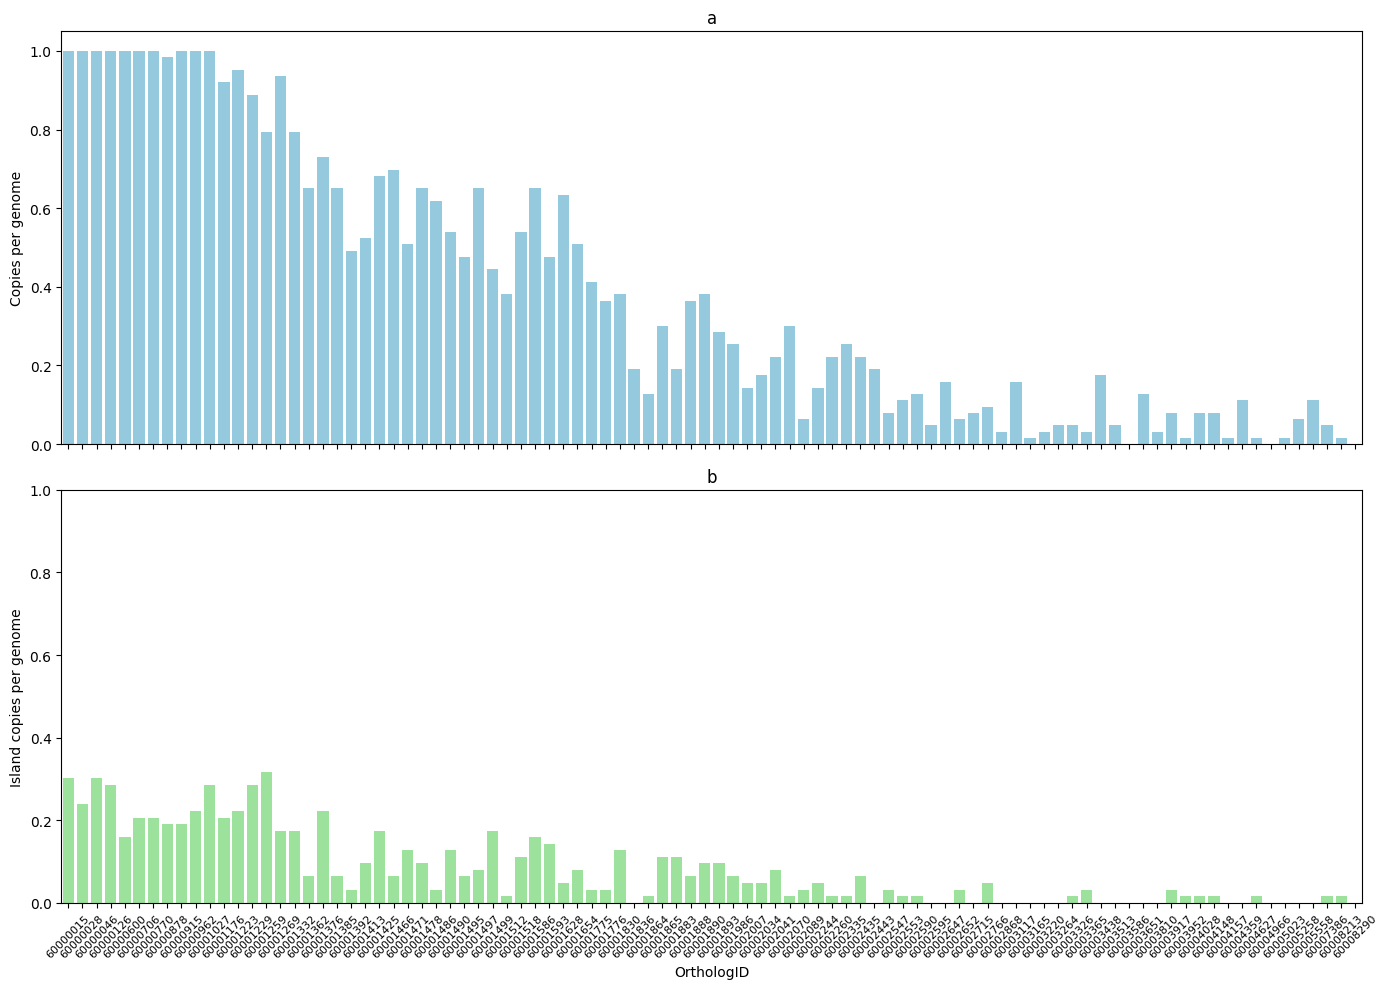

In [12]:
fig, axes = plt.subplots(2, 1, figsize=(14, 10), sharex=True)
max_y = max(combined_df['Genome_copies'].max(), combined_df['Island_copies'].max())


# Plotting the first set of bars
sns.barplot(ax=axes[0], x='OrthologID', y='Genome_copies', data=combined_df, color='skyblue')
axes[0].set_title('a')
axes[0].set_ylabel('Copies per genome')
axes[0].tick_params(axis='x', rotation=45, labelsize=10)  # Rotate x-axis labels

# Plotting the second set of bars
sns.barplot(ax=axes[1], x='OrthologID', y='Island_copies', data=combined_df, color='lightgreen')
axes[1].set_title('b')
axes[1].set_ylabel('Island copies per genome')
axes[1].set_xlabel('OrthologID')
axes[1].tick_params(axis='x', rotation=45, labelsize=8)  # Rotate x-axis labels
axes[1].set_ylim(0, max_y)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

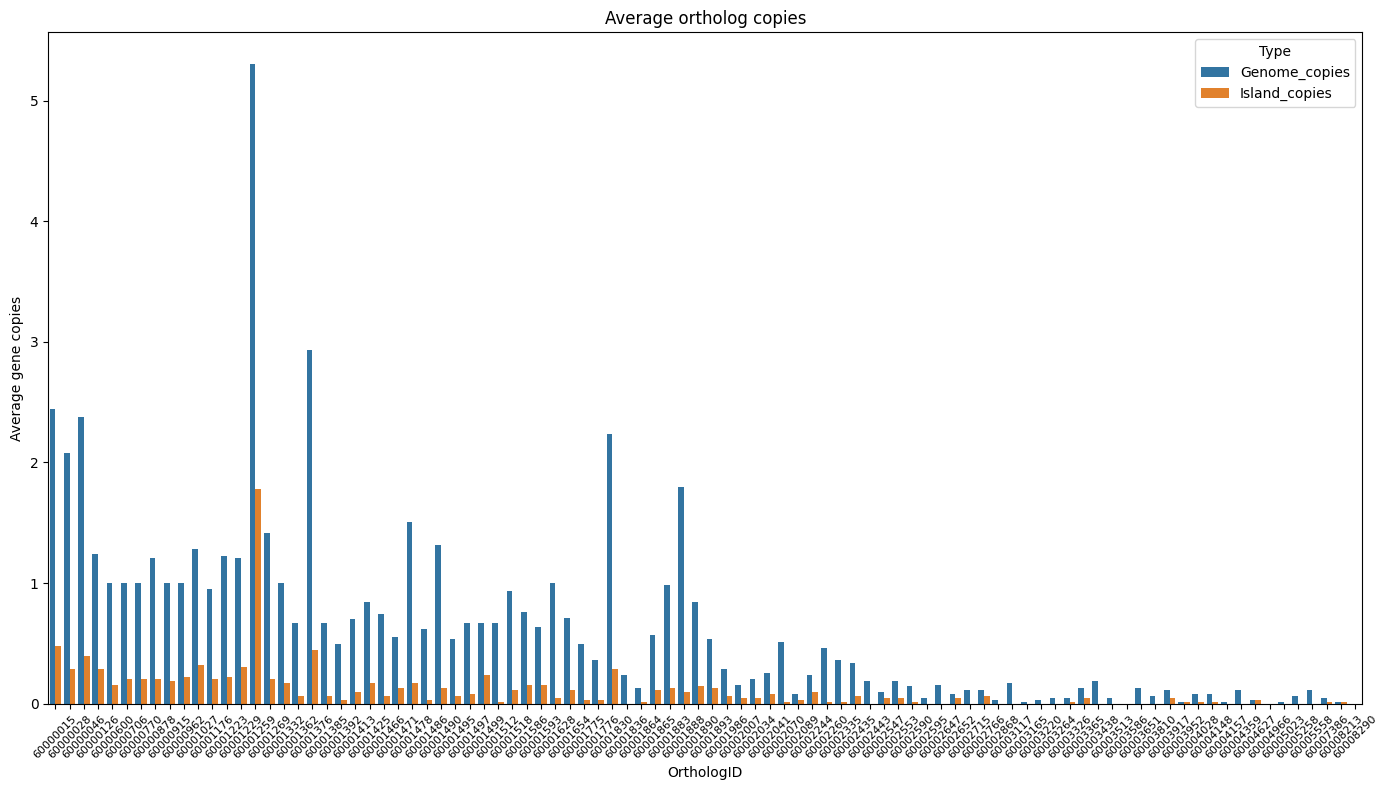

In [9]:
# Melt the DataFrame to long format
melted_df = combined_df.melt(id_vars='OrthologID', value_vars=['Genome_copies', 'Island_copies'],
                             var_name='Type', value_name='Average Overlaps')

# Plotting with seaborn
plt.figure(figsize=(14, 8))

# Create the bar plot
sns.barplot(data=melted_df, x='OrthologID', y='Average Overlaps', hue='Type')

# Adding labels and title
plt.xlabel('OrthologID')
plt.ylabel('Average gene copies')
plt.title('Average ortholog copies')
plt.xticks(rotation=45, fontsize=8)  # Rotate x-axis labels

# Show the plot
plt.tight_layout()
plt.show()

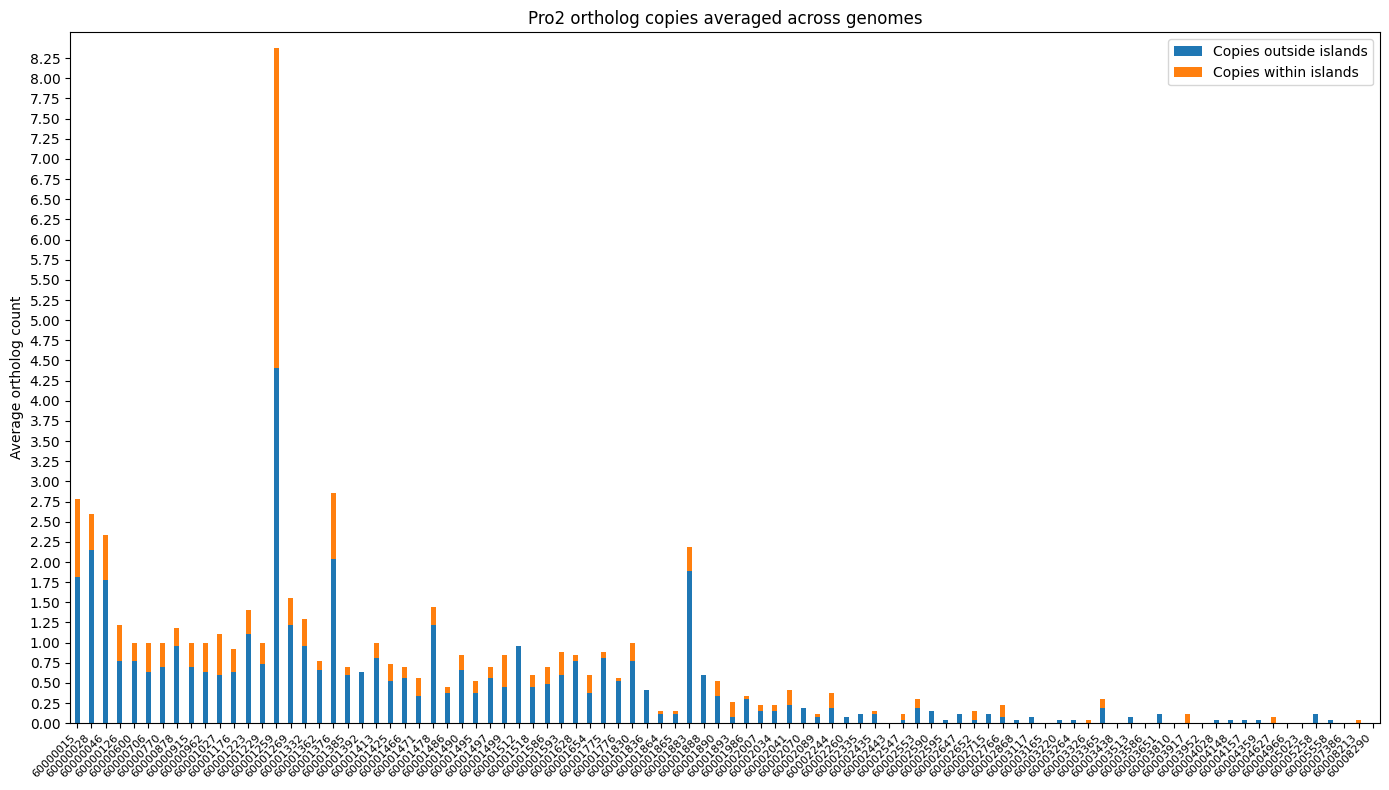

In [15]:


# Replace NaN values with 0 in 'Genome_copies' and 'Island_copies'
gen_cop = combined_df['Genome_copies'].fillna(0)
isl_cop = combined_df['Island_copies'].fillna(0)
non_island = gen_cop - isl_cop

# Extract data for plotting
N = len(combined_df)  # Number of bars
ind = np.arange(N)  # Index array for bars

# Plotting
fig, ax = plt.subplots(figsize=(14, 8))  # Get figure and axis

width = 0.35  # Width of the bars

# Plot non_island bars
p1 = ax.bar(ind, non_island, width)

# Plot island bars stacked on non_island bars
p2 = ax.bar(ind, isl_cop, width, bottom=non_island)

# Customize plot
ax.set_ylabel('Average ortholog count')
ax.set_yticks(np.arange(0, max(gen_cop), 0.25))  # Adjust y-axis ticks
ax.set_title('Pro2 ortholog copies averaged across genomes')
ax.set_xticks(ind)
ax.set_xticklabels(combined_df['OrthologID'], rotation=45, ha='right', fontsize=8)


ax.legend((p1[0], p2[0]), ('Copies outside islands', 'Copies within islands'))

# Adjust plot limits for better fit
ax.set_xlim(-0.5, N - 0.5)  # Set x-axis limits to fit all bars
ax.set_ylim(0, max(gen_cop) + 0.2)  # Set y-axis limits with some padding

plt.tight_layout()
plt.show()
